<a href="https://colab.research.google.com/github/tempestormX/sc3021/blob/main/SC3021_FDAG_T13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

#**To what extent do greenhouse gas emissions and other human factors correlate with multi-dimensional weather patterns in each global region?**



## Hypothesis/analysis goal (Ask)


---



As the world becomes more industrialised, it has become evident that emissions of greenhouse gases into the atmosphere have been increasing. Weather patterns have been becoming more unpredictable and weather changes have become more drastic over time as well, as it is rather obvious that greenhouse gas emission affects the weather negatively. Atmospheric quality is dictated by a diverse array of greenhouse gases, each interacting uniquely with specific weather indicators such as temperature volatility, precipitation patterns, and atmospheric pressure. Therefore, we want to investigate the relationship between greenhouse gas emissions and weather patterns on a global scale to find out how these greenhouse gases affect the weather indicators in different regions globally.



## Data source identification and exploration (Prepare)

---



**Requirement analysis**: The greenhouse gases we are using for this analysis are Carbon Dioxide and Methane, as they are the main greenhouse gases. For each of them, we need data on emission by each country, emission per year and yearly changes in emission per country.

For weather patterns, our data should include different weather indicators for each country. Different weather indicators include precipitation, atmospheric pressure, wind speed, wind direction  and temperature. By merging these atmospheric and meteorological datasets, we can perform a multi-dimensional correlation analysis to identify how specific gases drive changes in regional climate stability and determine which factors have the most significant impact on global weather patterns



**List of considered sources:**
- [Earth Surface Temperature Data by Berkeley Earth](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCity.csv)
- [Daily Weather Data](https://www.kaggle.com/datasets/guillemservera/global-daily-climate-data/data?select=daily_weather.parquet)
- [Methane Emissions Data](https://ourworldindata.org/grapher/methane-emissions?tab=table&time=earliest..2024&country=OWID_ASI~OWID_NAM~OWID_SAM~OWID_EUR~USA~RUS)
- [Deforestation Data](https://ourworldindata.org/deforestation)
- [Carbon Dioxide Emissions Data](https://ourworldindata.org/co2-dataset-sources)


### DS1: Earth Surface Temperature Data by Berkeley Earth



Description


The Berkeley Earth Surface temperature dataset, downloaded on 19/02/2026, contains comprehensive historical temperature records from cities worldwide, offering essential data for our climate analysis. The data set includes monthly average temperature measurements with uncertianty estimates, along with geographical coordinates (latitude and longitude) and city/country identifiers. This granularity at the city level is appropriate for correlating with country-level greenhouse gas emissions data. The temporal coverage spans from 1743 to present, providing sufficient historical depth to analyse long-term climate trends in relation to industrialisation and emission patterns. The following code imports the data and displays the first few rows to illustrate the stored information.

In [3]:
#Create directory and download dataset from Kaggle
!mkdir /content/berkeley-temp
!curl -L -o /content/berkeley-temp.zip\
  https://www.kaggle.com/api/v1/datasets/download/berkeleyearth/climate-change-earth-surface-temperature-data
!unzip /content/berkeley-temp.zip -d /content/berkeley-temp/
!rm /content/berkeley-temp.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 84.7M  100 84.7M    0     0  76.9M      0  0:00:01  0:00:01 --:--:-- 76.9M
Archive:  /content/berkeley-temp.zip
  inflating: /content/berkeley-temp/GlobalLandTemperaturesByCity.csv  
  inflating: /content/berkeley-temp/GlobalLandTemperaturesByCountry.csv  
  inflating: /content/berkeley-temp/GlobalLandTemperaturesByMajorCity.csv  
  inflating: /content/berkeley-temp/GlobalLandTemperaturesByState.csv  
  inflating: /content/berkeley-temp/GlobalTemperatures.csv  


In [4]:
data_path = "/content/berkeley-temp/"
temp_by_city = pd.read_csv(data_path + "GlobalLandTemperaturesByCity.csv")
temp_by_city['dt'] = pd.to_datetime(temp_by_city['dt'])
print(temp_by_city.head())

          dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0 1743-11-01               6.068                          1.737  Århus   
1 1743-12-01                 NaN                            NaN  Århus   
2 1744-01-01                 NaN                            NaN  Århus   
3 1744-02-01                 NaN                            NaN  Århus   
4 1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E  


Looking at this sample data, we observe that dates are stored in yyyy-mm-dd format, temperature values are in degree Celsius with associated uncertainty measurements, and geographical information is provided at the city level. The dataset contains over 8.5 million records, indicating comprehensive global coverage. However, we note the presence of NaN values in early records, suggesting data completeness varies across the temporal range.

Data Profiling and Exploration

Basic Dataset Information

In [5]:
temp_by_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dt                             datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude                       object        
 6   Longitude                      object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 459.2+ MB


In [6]:
temp_by_city.describe()

,dt,AverageTemperature,AverageTemperatureUncertainty
count,8599212,8.235082e+06,8.235082e+06
mean,1907-10-21 07:06:00.828411904,1.672743e+01,1.028575e+00
min,1743-11-01 00:00:00,-4.270400e+01,3.400000e-02
25%,1860-06-01 00:00:00,1.029900e+01,3.370000e-01
50%,1911-09-01 00:00:00,1.883100e+01,5.910000e-01
75%,1962-09-01 00:00:00,2.521000e+01,1.349000e+00
max,2013-09-01 00:00:00,3.965100e+01,1.539600e+01
std,NaN,1.035344e+01,1.129733e+00


Visualisation 1: Global Average Temperature Trend Over Time

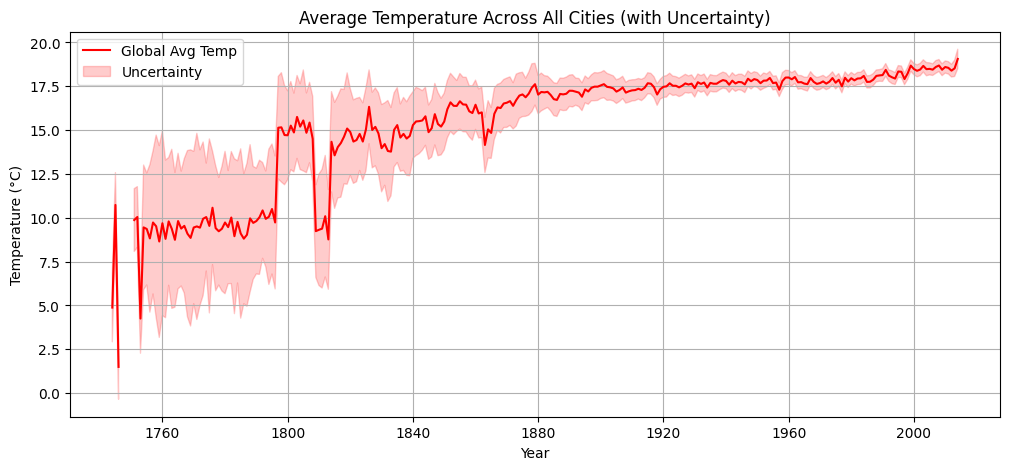

In [7]:
# Compute mean for numeric columns
numeric_cols = ['AverageTemperature', 'AverageTemperatureUncertainty']
df_yearly = temp_by_city[numeric_cols + ['dt']].resample('YE', on='dt').mean()

# Plot yearly average temperature with uncertainty
plt.figure(figsize=(12,5))
plt.plot(df_yearly.index, df_yearly['AverageTemperature'], color='red', label='Global Avg Temp')
plt.fill_between(
    df_yearly.index,
    df_yearly['AverageTemperature'] - df_yearly['AverageTemperatureUncertainty'],
    df_yearly['AverageTemperature'] + df_yearly['AverageTemperatureUncertainty'],
    color='red', alpha=0.2, label='Uncertainty'
)
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Average Temperature Across All Cities (with Uncertainty)')
plt.legend()
plt.grid(True)
plt.show()

This visualisation reveals a clear upward trend in global average temperatures, particularly pronounced from the mid-20th century onwards, coinciding with increased industrial activity and greenhouse gas emissions.

Visualisation 2: Temperature Distribution Histogram

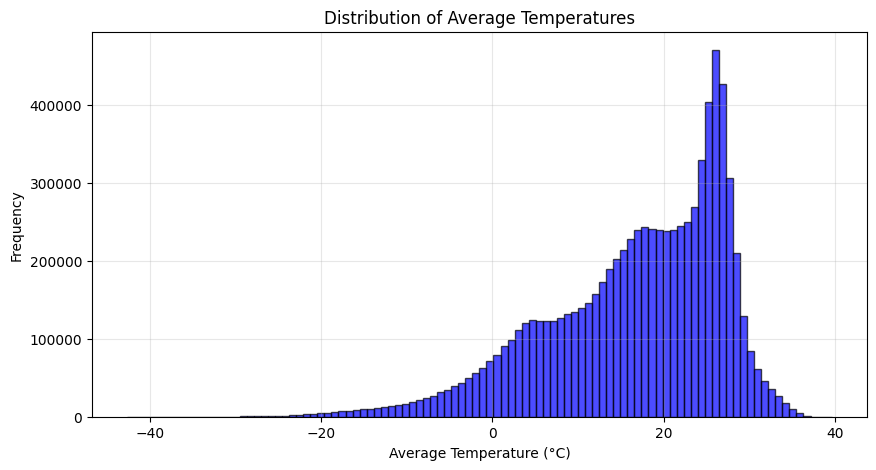

In [9]:
#Plot distribution of average temperatures
plt.figure (figsize=(10,5))
plt.hist(temp_by_city['AverageTemperature'].dropna(), bins=100,
         color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Temperatures')
plt.grid(True,alpha=0.3)
plt.show()

The histogram shows a roughly normal distribution of temperature centered around 15-20°C, with tails extending to extreme cold and hot temperatures, reflecting the global diveristy of climate zones in the dataset.

Visualisation 3: Missing Data Pattern Over Time

/tmp/ipython-input-3498040263.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_year = temp_by_city.groupby('year').apply(


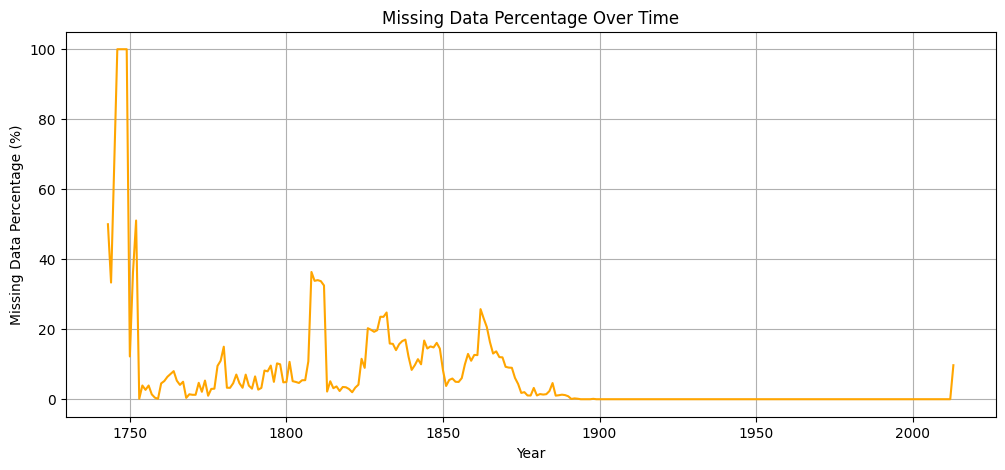

In [10]:
#Calculate percentage of missing values per year
temp_by_city['year'] = temp_by_city['dt'].dt.year
missing_by_year = temp_by_city.groupby('year').apply(
    lambda x: (x['AverageTemperature'].isna().sum()/len(x)) *100

)

#Plot missing data percentage over time
plt.figure(figsize=(12,5))
plt.plot(missing_by_year.index, missing_by_year.values, color = 'orange')
plt.xlabel('Year')
plt.ylabel('Missing Data Percentage (%)')
plt.title('Missing Data Percentage Over Time')
plt.grid(True)
plt.show()


This visualisation highlights significant data gaps in early historical records (pre 1900s), with completeness improving substantially in the 20th century. This pattern must be considered when analysing long-term trends.

Visualisation 4: Temperature Trends by Region (Sample Countries)

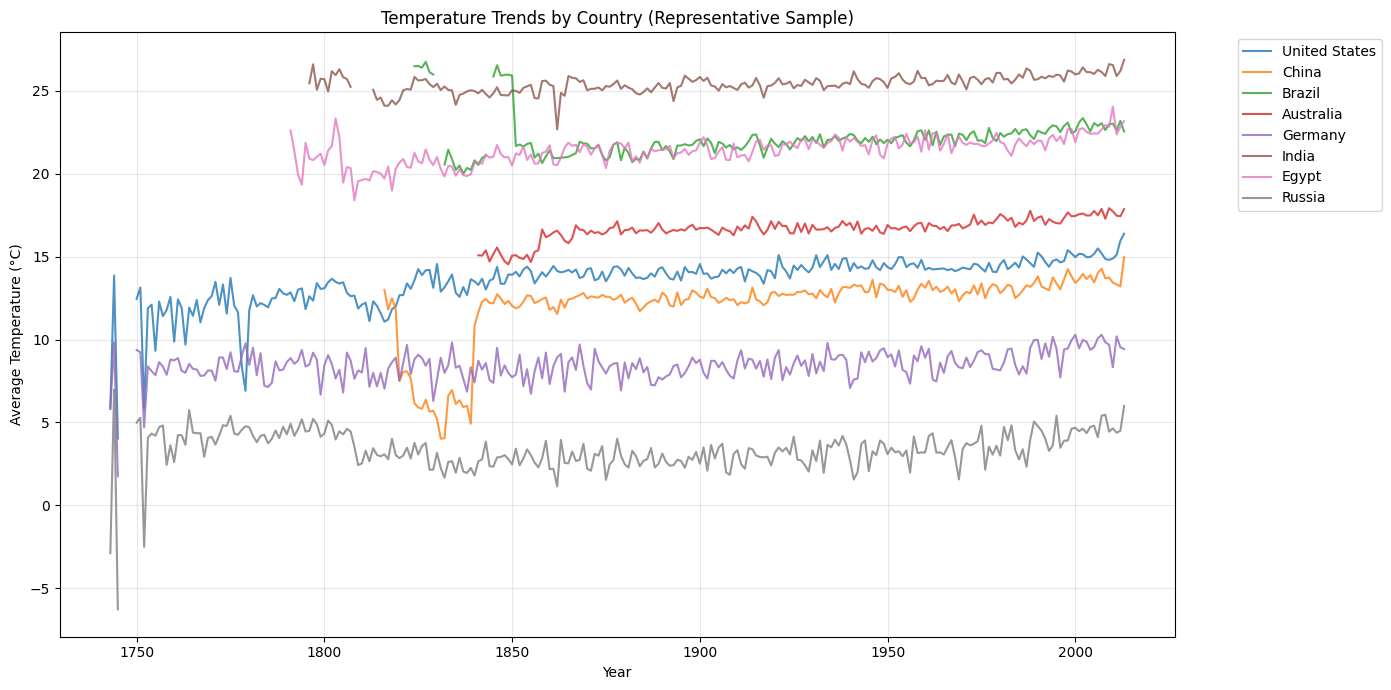

In [11]:
#Select representativ countries from different climate zones
sample_countries = ['United States', 'China', 'Brazil', 'Australia',
                    'Germany', 'India', 'Egypt', 'Russia']

plt.figure(figsize=(14, 7))

for country in sample_countries:
    country_data = temp_by_city[temp_by_city['Country'] == country]
    if not country_data.empty:
        country_yearly = country_data.groupby(country_data['dt'].dt.year)['AverageTemperature'].mean()
        plt.plot(country_yearly.index, country_yearly.values, label=country, alpha=0.8)

plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Temperature Trends by Country (Representative Sample)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


This multi-line plot demonstrates varuing baseline temperatures across different climate zones while revealing a consistent warming trend across most regions in recent decades.

Visualisation 5: Seasonal Temperature Patterns

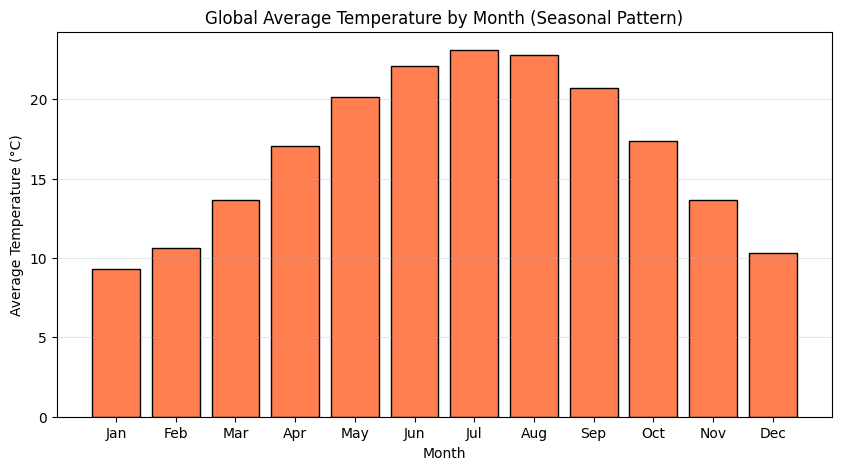

In [12]:
# Extract month and calculate global monthly averages
temp_by_city['month'] = temp_by_city['dt'].dt.month
monthly_avg = temp_by_city.groupby('month')['AverageTemperature'].mean()

# Plot seasonal pattern
plt.figure(figsize=(10, 5))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(range(1, 13), monthly_avg.values, color='coral', edgecolor='black')
plt.xticks(range(1, 13), months)
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Global Average Temperature by Month (Seasonal Pattern)')
plt.grid(True, alpha=0.3, axis='y')
plt.show()

The seasonal pattern shows expected variations with peak temperatures in July-August and lowest temperatures in January-February for the Northern Hemisphere dominated dataset.

Visualisation 6: Top 20 Hottest Cities (Average Temperature)

In [14]:
# Show top 20 hottest cities
city_avg = temp_by_city.groupby('City')[numeric_cols].mean().sort_values('AverageTemperature', ascending=False)
print(city_avg.head(20))

              AverageTemperature  AverageTemperatureUncertainty
City                                                           
Jibuti                 29.152790                       0.923249
Umm Durman             29.081291                       0.890629
Khartoum               29.081291                       0.890629
Niamey                 29.062560                       0.779363
Kassala                28.938776                       0.860550
Mopti                  28.784449                       0.890024
Rabak                  28.598226                       0.806627
Kusti                  28.598226                       0.806627
Tiruvottiyur           28.417858                       0.999483
Madras                 28.417858                       0.999483
Avadi                  28.417858                       0.999483
Pallavaram             28.417858                       0.999483
Tirupati               28.417858                       0.999483
Alandur                28.417858        

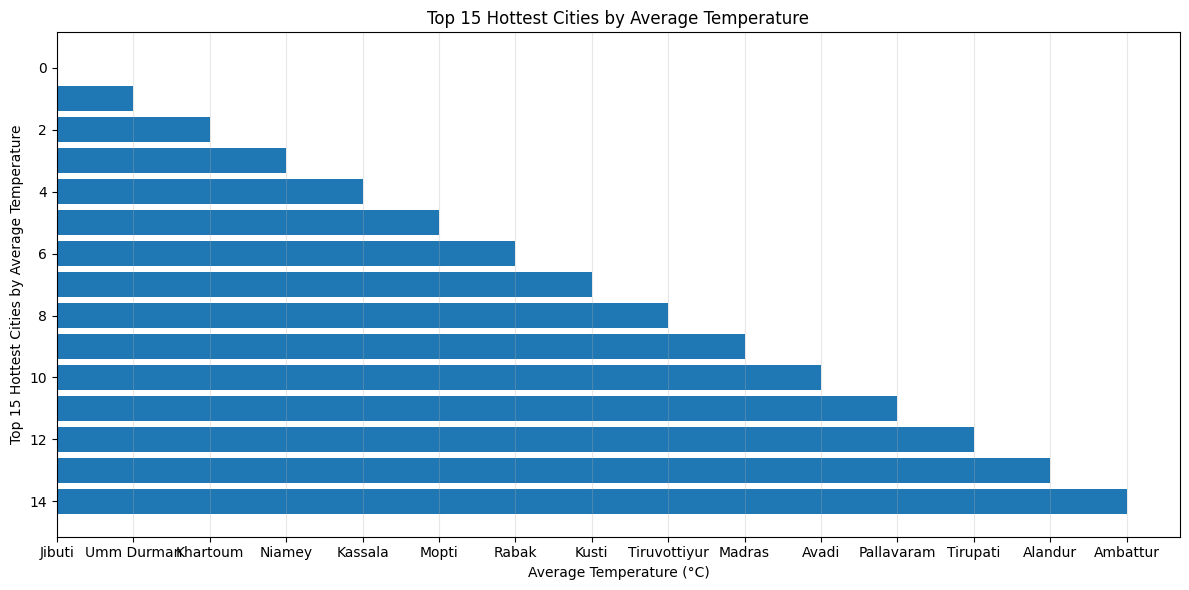

In [15]:
#Visualise top 15
top_15 = city_avg.head(15)
plt.figure(figsize=(12, 6))
plt.barh(range(len(top_15)),top_15.index)
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Top 15 Hottest Cities by Average Temperature')
plt.title('Top 15 Hottest Cities by Average Temperature')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

Data Quality Considerations

We assessed the follwing quality criteria to determine the suitability of the dataset for our greenhouse gas and weather pattern analysis:


Completeness


The dataset demonstrates high breadth and depth in terms of geographical coverage, covering over 8.5 million temperature records from cities worldwide. However, completeness vairies significantly across time periods. Early records (pre 1900s) contain substantial missing values while data quality improves remarkably in the 20th and the 21st centuries. For our analysis focusing on industrialisation impacts, the more complete recent data aligns well with out needs, but we must account for temporal bias when analysing long-term trends

Interpretability

The dataset exhibits high interpretability with clear attribute semantics. Temperature values are consistently recorded in degree Celsius with explicit uncertainty measurements, and geographical identifiers use standard naming conventions. this clarity minimises the risk of misinterpretation during analysis and facilitates straightforward integration with emission datasets.

Reputation

Berkeley Earth is a well-renowned organisation in the field of Climate Science, and the dataset has undergone rigorous quality control processes. The provenance is well documented, including methodology for handling station data, homogenisation procedures, and uncertainty quantification. This strong reputation enhances confidence in the reliability of our analysis results.

Timeliness

While the dataset is regularly updated, there may be a lag in recent months due to the data collection and validating process. For our historical analysis focusing on lone-term trends, this is not a significant limitation.

Conclusion

The Berkeley Earth Surface Temerpature dataset is highly suitable for our analysis of the relationship between greenhouse gas emissions and weather patterns. The dataset's extensive geographical coverage, long temporal span, and city level granularity enable meaninggful correlation with country-level emission data.

Key Points for Data Pre

### DS2: Daily Weather Data

In [ ]:
!mkdir /content/weather
!curl -L -o /content/weather.zip\
  https://www.kaggle.com/api/v1/datasets/download/guillemservera/global-daily-climate-data
!unzip /content/weather.zip -d /content/weather/
!rm /content/weather.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  212M  100  212M    0     0   145M      0  0:00:01  0:00:01 --:--:--  205M
Archive:  /content/weather.zip
  inflating: /content/weather/cities.csv  
  inflating: /content/weather/countries.csv  
  inflating: /content/weather/daily_weather.parquet  


In [ ]:
data_path = "/content/weather/"
weather = pd.read_parquet(data_path + "daily_weather.parquet")
# weather['dt'] = pd.to_datetime(weather['dt'])
print(weather.head())

  station_id city_name       date  season  avg_temp_c  min_temp_c  max_temp_c  \
0      41515  Asadabad 1957-07-01  Summer        27.0        21.1        35.6   
1      41515  Asadabad 1957-07-02  Summer        22.8        18.9        32.2   
2      41515  Asadabad 1957-07-03  Summer        24.3        16.7        35.6   
3      41515  Asadabad 1957-07-04  Summer        26.6        16.1        37.8   
4      41515  Asadabad 1957-07-05  Summer        30.8        20.0        41.7   

   precipitation_mm  snow_depth_mm  avg_wind_dir_deg  avg_wind_speed_kmh  \
0               0.0            NaN               NaN                 NaN   
1               0.0            NaN               NaN                 NaN   
2               1.0            NaN               NaN                 NaN   
3               4.1            NaN               NaN                 NaN   
4               0.0            NaN               NaN                 NaN   

   peak_wind_gust_kmh  avg_sea_level_pres_hpa  sunshine_

In [ ]:
cities = pd.read_csv(data_path + "cities.csv")
print(cities.head())

  station_id   city_name      country       state iso2 iso3   latitude  \
0      41515    Asadabad  Afghanistan       Kunar   AF  AFG  34.866000   
1      38954    Fayzabad  Afghanistan  Badakhshan   AF  AFG  37.129761   
2      41560   Jalalabad  Afghanistan   Nangarhar   AF  AFG  34.441527   
3      38947      Kunduz  Afghanistan      Kunduz   AF  AFG  36.727951   
4      38987  Qala i Naw  Afghanistan     Badghis   AF  AFG  34.983000   

   longitude  
0  71.150005  
1  70.579247  
2  70.436103  
3  68.872530  
4  63.133300  


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27635763 entries, 0 to 24220
Data columns (total 14 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   station_id              category      
 1   city_name               category      
 2   date                    datetime64[us]
 3   season                  category      
 4   avg_temp_c              float64       
 5   min_temp_c              float64       
 6   max_temp_c              float64       
 7   precipitation_mm        float64       
 8   snow_depth_mm           float64       
 9   avg_wind_dir_deg        float64       
 10  avg_wind_speed_kmh      float64       
 11  peak_wind_gust_kmh      float64       
 12  avg_sea_level_pres_hpa  float64       
 13  sunshine_total_min      float64       
dtypes: category(3), datetime64[us](1), float64(10)
memory usage: 2.6 GB


In [ ]:
weather.describe()

,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
count,27635763,2.140486e+07,2.191753e+07,2.209642e+07,2.099326e+07,3.427148e+06,3.452568e+06,5.285468e+06,1.121486e+06,4.017157e+06,1.021461e+06
mean,1982-11-29 10:03:03.195926,1.572252e+01,9.948255e+00,2.015998e+01,2.740569e+00,7.996231e+01,1.820979e+02,1.240827e+01,3.857887e+01,1.015032e+03,3.504399e+02
min,1750-02-01 00:00:00,-7.000000e+01,-9.900000e+01,-9.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.610000e+02,0.000000e+00
25%,1965-05-06 00:00:00,8.300000e+00,2.800000e+00,1.200000e+01,0.000000e+00,0.000000e+00,8.600000e+01,7.500000e+00,2.630000e+01,1.010300e+03,5.400000e+01
50%,1988-02-04 00:00:00,1.790000e+01,1.110000e+01,2.230000e+01,0.000000e+00,0.000000e+00,1.910000e+02,1.090000e+01,3.530000e+01,1.014700e+03,3.460000e+02
75%,2007-01-25 00:00:00,2.570000e+01,1.920000e+01,3.020000e+01,1.000000e+00,2.000000e+01,2.710000e+02,1.570000e+01,4.640000e+01,1.019800e+03,5.940000e+02
max,2023-09-05 00:00:00,5.040000e+01,6.420000e+01,9.700000e+01,1.000000e+03,9.710000e+03,3.600000e+02,1.763000e+02,4.392000e+02,5.852700e+03,1.302000e+03
std,NaN,1.202205e+01,1.155787e+01,1.249478e+01,9.791887e+00,3.500756e+02,1.051996e+02,7.054249e+00,2.010951e+01,8.520450e+00,2.815142e+02


In [ ]:
cities = cities.with_columns(
    pl.col("station_id").cast(pl.Categorical)
)
merged = weather.join(cities, on="station_id", how="left")
print(merged.head())


AttributeError: 'DataFrame' object has no attribute 'with_columns'

In [ ]:
merged_pd = merged.to_pandas()

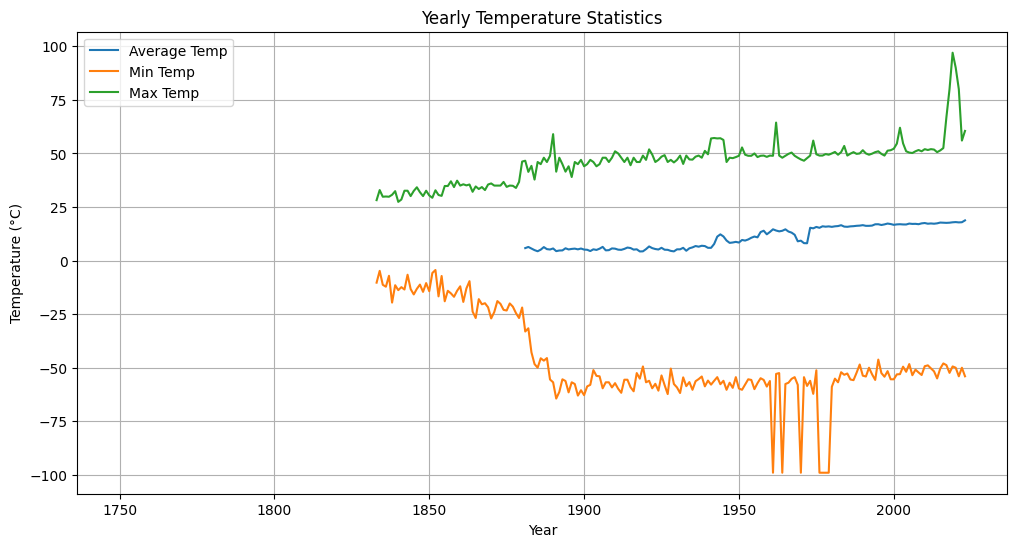

In [ ]:
df_yearly = weather.resample('YE', on='date').agg({
    'avg_temp_c': 'mean',
    'min_temp_c': 'min',
    'max_temp_c': 'max'
})

plt.figure(figsize=(12,6))
plt.plot(df_yearly.index.year, df_yearly['avg_temp_c'], label='Average Temp')
plt.plot(df_yearly.index.year, df_yearly['min_temp_c'], label='Min Temp')
plt.plot(df_yearly.index.year, df_yearly['max_temp_c'], label='Max Temp')

plt.title('Yearly Temperature Statistics')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

### DS3: Community Emissions Data System (CEDS)

In [ ]:
!curl -L -o /content/CEDS_v_2025_03_18_aggregate.zip\
  https://zenodo.org/records/15059443/files/CEDS_v_2025_03_18_aggregate.zip?download=1
!unzip /content/CEDS_v_2025_03_18_aggregate.zip -d /content
!rm /content/CEDS_v_2025_03_18_aggregate.zip
!rm -rf /content/__MACOSX

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 59.8M  100 59.8M    0     0  17.6M      0  0:00:03  0:00:03 --:--:-- 17.6M
Archive:  /content/CEDS_v_2025_03_18_aggregate.zip
   creating: /content/CEDS_v_2025_03_18_aggregate/
  inflating: /content/CEDS_v_2025_03_18_aggregate/NOx_CEDS_estimates_by_country_fuel_v_2025_03_18.csv  
  inflating: /content/__MACOSX/CEDS_v_2025_03_18_aggregate/._NOx_CEDS_estimates_by_country_fuel_v_2025_03_18.csv  
  inflating: /content/CEDS_v_2025_03_18_aggregate/NOx_CEDS_global_estimates_by_sector_v_2025_03_18.csv  
  inflating: /content/__MACOSX/CEDS_v_2025_03_18_aggregate/._NOx_CEDS_global_estimates_by_sector_v_2025_03_18.csv  
  inflating: /content/CEDS_v_2025_03_18_aggregate/N2O_CEDS_estimates_by_country_sector_v_2025_03_18.csv  
  inflating: /content/__MACOSX/CEDS_v_2025_03_18_aggregate/._N2O_CEDS_estimates_by_country_sector_v_2025_03_18.csv 

In [ ]:
!ls /content/CEDS_v_2025_03_18_aggregate/

BC_CEDS_estimates_by_country_fuel_v_2025_03_18.csv
BC_CEDS_estimates_by_country_sector_v_2025_03_18.csv
BC_CEDS_estimates_by_country_v_2025_03_18.csv
BC_CEDS_global_estimates_by_fuel_v_2025_03_18.csv
BC_CEDS_global_estimates_by_sector_fuel_v_2025_03_18.csv
BC_CEDS_global_estimates_by_sector_v_2025_03_18.csv
CH4_CEDS_estimates_by_country_fuel_v_2025_03_18.csv
CH4_CEDS_estimates_by_country_sector_v_2025_03_18.csv
CH4_CEDS_estimates_by_country_v_2025_03_18.csv
CH4_CEDS_global_estimates_by_fuel_v_2025_03_18.csv
CH4_CEDS_global_estimates_by_sector_fuel_v_2025_03_18.csv
CH4_CEDS_global_estimates_by_sector_v_2025_03_18.csv
CO2_CEDS_estimates_by_country_fuel_v_2025_03_18.csv
CO2_CEDS_estimates_by_country_sector_v_2025_03_18.csv
CO2_CEDS_estimates_by_country_v_2025_03_18.csv
CO2_CEDS_global_estimates_by_fuel_v_2025_03_18.csv
CO2_CEDS_global_estimates_by_sector_fuel_v_2025_03_18.csv
CO2_CEDS_global_estimates_by_sector_v_2025_03_18.csv
CO_CEDS_estimates_by_country_fuel_v_2025_03_18.csv
CO_CEDS_es

In [ ]:
data_path = "/content/CEDS_v_2025_03_18_aggregate/"
bc = pd.read_csv(data_path + "BC_CEDS_estimates_by_country_v_2025_03_18.csv")
ch4 = pd.read_csv(data_path + "CH4_CEDS_estimates_by_country_v_2025_03_18.csv")
co2 = pd.read_csv(data_path + "CO2_CEDS_estimates_by_country_v_2025_03_18.csv")
co = pd.read_csv(data_path + "CO_CEDS_estimates_by_country_v_2025_03_18.csv")
n2o = pd.read_csv(data_path + "N2O_CEDS_estimates_by_country_v_2025_03_18.csv")
nh3 = pd.read_csv(data_path + "NH3_CEDS_estimates_by_country_v_2025_03_18.csv")
nmvoc = pd.read_csv(data_path + "NMVOC_CEDS_estimates_by_country_v_2025_03_18.csv")
no2 = pd.read_csv(data_path + "NOx_CEDS_estimates_by_country_v_2025_03_18.csv")
oc = pd.read_csv(data_path + "OC_CEDS_estimates_by_country_v_2025_03_18.csv")
so2 = pd.read_csv(data_path + "SO2_CEDS_estimates_by_country_v_2025_03_18.csv")

In [ ]:
n2o['units'].unique()

array(['ktN2O'], dtype=object)

In [ ]:
dfs = [bc, ch4, co2, co, n2o, nh3, nmvoc, nox, oc, soc]
long_dfs = []
for df in dfs:
    year_cols = [col for col in df.columns if col.startswith('X')]
    df.drop(columns='units')
    df_long = df.melt(id_vars=['em', 'country'],
                      value_vars=year_cols,
                      var_name='year', value_name='value')
    df_long['year'] = df_long['year'].str[1:].astype(int)
    long_dfs.append(df_long)

ds3 = pd.concat(long_dfs, ignore_index=True)

ds3 = ds3.pivot_table(
          index=['country', 'year'],
          columns='em',
          values='value'
      ).reset_index()

ds3 = ds3.rename(columns={"NOx": "NO2"})

ds3

NameError: name 'nox' is not defined

In [ ]:
ds3.info()

In [ ]:
year_cols = [col for col in co2.columns if col.startswith('X')]
df_years = co2[year_cols].copy()
df_years.columns = [int(col[1:]) for col in df_years.columns]
df_years['country'] = co2['country']

top_n = 5
top_countries = df_years.sort_values(by=2023, ascending=False).head(top_n)

# Plot
plt.figure(figsize=(15,7))
for idx, row in top_countries.iterrows():
    plt.plot(df_years.columns[:-1], row[df_years.columns[:-1]], label=row['country'])

plt.title(f'Top {top_n} CO2 Emitting Countries Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (ktCO2)')
plt.legend()
plt.grid(True)
plt.show()